In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report 

In [57]:
bankdata=pd.read_csv(r'C:\Users\Lenovo\Downloads\bank-full.csv')
bankdata.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [58]:
bankdata.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [59]:
bankdata.shape

(45211, 17)

In [60]:
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [61]:
bankdata.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [62]:
bankdata.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


<AxesSubplot:xlabel='y', ylabel='age'>

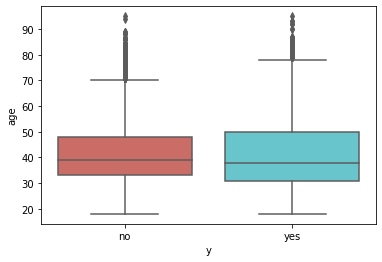

In [63]:
sns.boxplot(x="y",y="age",data=bankdata,palette="hls")

<AxesSubplot:xlabel='y'>

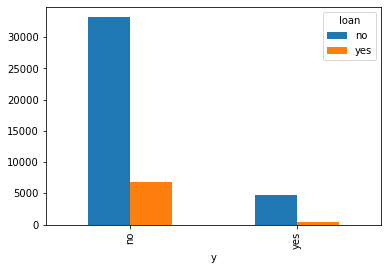

In [64]:
pd.crosstab(bankdata.y,bankdata.loan).plot(kind = 'bar')  

In [65]:
bankdata.contact.value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

<AxesSubplot:xlabel='y'>

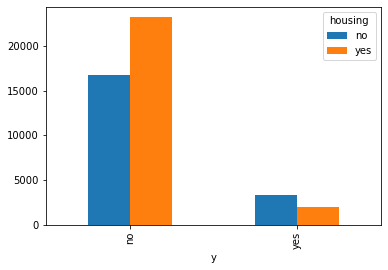

In [66]:
pd.crosstab(bankdata.y,bankdata.housing).plot(kind = 'bar') 

<AxesSubplot:xlabel='y'>

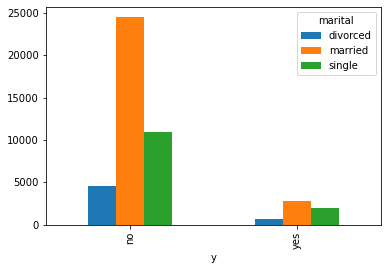

In [67]:
pd.crosstab(bankdata.y,bankdata.marital).plot(kind = 'bar') 

<AxesSubplot:xlabel='y'>

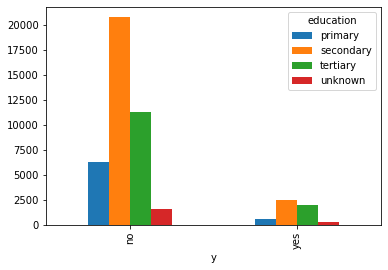

In [68]:
pd.crosstab(bankdata.y,bankdata.education).plot(kind = 'bar') 

<AxesSubplot:xlabel='loan'>

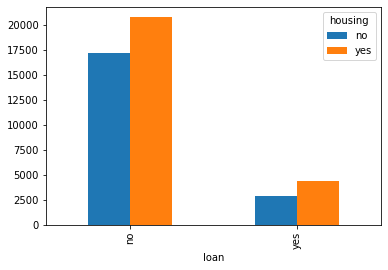

In [69]:
pd.crosstab(bankdata.loan,bankdata.housing).plot(kind = 'bar') 

<AxesSubplot:xlabel='education'>

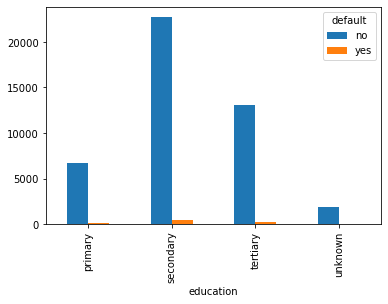

In [70]:
pd.crosstab(bankdata.education,bankdata.default).plot(kind = 'bar') 

In [71]:
data_category=bankdata.select_dtypes(exclude=[np.number]).columns
data_category

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [75]:
from sklearn.preprocessing import LabelEncoder
labelEncoder=LabelEncoder()
for i in data_category:
    bankdata[i]=labelEncoder.fit_transform(bankdata[i])

In [76]:
bankdata.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [77]:
from sklearn.preprocessing import MinMaxScaler
trans=MinMaxScaler()
bankdata1=pd.DataFrame(trans.fit_transform(bankdata.iloc[:,[0,5,9,11,12,13,14]]))
bankdata1.head()

,0,1,2,3,4,5,6
0,0.519481,0.092259,0.133333,0.053070,0.0,0.0,0.0
1,0.337662,0.073067,0.133333,0.030704,0.0,0.0,0.0
2,0.194805,0.072822,0.133333,0.015453,0.0,0.0,0.0
3,0.376623,0.086476,0.133333,0.018707,0.0,0.0,0.0
4,0.194805,0.072812,0.133333,0.040260,0.0,0.0,0.0


In [78]:
bankdata1.columns=['age','balance','day','duration','campaign','pdays','previous']
bankdata1.head()

,age,balance,day,duration,campaign,pdays,previous
0,0.519481,0.092259,0.133333,0.053070,0.0,0.0,0.0
1,0.337662,0.073067,0.133333,0.030704,0.0,0.0,0.0
2,0.194805,0.072822,0.133333,0.015453,0.0,0.0,0.0
3,0.376623,0.086476,0.133333,0.018707,0.0,0.0,0.0
4,0.194805,0.072812,0.133333,0.040260,0.0,0.0,0.0


In [79]:
bankdata2=bankdata[['job','marital','education','default','housing','loan','contact','month','poutcome','y']]
bankdata2.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,4,1,2,0,1,0,2,8,3,0
1,9,2,1,0,1,0,2,8,3,0
2,2,1,1,0,1,1,2,8,3,0
3,1,1,3,0,1,0,2,8,3,0
4,11,2,3,0,0,0,2,8,3,0


In [80]:
bank_data=pd.concat([bankdata1,bankdata2],axis=1)
bank_data.head()

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,0.519481,0.092259,0.133333,0.053070,0.0,0.0,0.0,4,1,2,0,1,0,2,8,3,0
1,0.337662,0.073067,0.133333,0.030704,0.0,0.0,0.0,9,2,1,0,1,0,2,8,3,0
2,0.194805,0.072822,0.133333,0.015453,0.0,0.0,0.0,2,1,1,0,1,1,2,8,3,0
3,0.376623,0.086476,0.133333,0.018707,0.0,0.0,0.0,1,1,3,0,1,0,2,8,3,0
4,0.194805,0.072812,0.133333,0.040260,0.0,0.0,0.0,11,2,3,0,0,0,2,8,3,0


In [81]:
X = bank_data.iloc[:,0:16]
Y = bank_data.iloc[:,16]
classifier = LogisticRegression()
classifier.fit(X,Y) 

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [82]:
classifier.coef_ 

array([[ 7.52008510e-01,  7.17220145e-01, -2.47410297e-01,
         1.77233739e+01, -3.22707068e+00,  3.21997704e+00,
         6.03620130e-01,  1.23560600e-02,  2.56350636e-01,
         2.12535693e-01, -4.34438259e-01, -1.00445271e+00,
        -6.49244473e-01, -6.46545283e-01,  4.85164260e-02,
         1.41117705e-01]])

In [83]:
classifier.predict_proba (X)

array([[0.96493521, 0.03506479],
       [0.97716091, 0.02283909],
       [0.99409571, 0.00590429],
       ...,
       [0.08680244, 0.91319756],
       [0.77717932, 0.22282068],
       [0.68060903, 0.31939097]])

In [84]:
y_pred = classifier.predict(X)
bank_data["y_pred"] = y_pred
bank_data.head()  

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,y,y_pred
0,0.519481,0.092259,0.133333,0.053070,0.0,0.0,0.0,4,1,2,0,1,0,2,8,3,0,0
1,0.337662,0.073067,0.133333,0.030704,0.0,0.0,0.0,9,2,1,0,1,0,2,8,3,0,0
2,0.194805,0.072822,0.133333,0.015453,0.0,0.0,0.0,2,1,1,0,1,1,2,8,3,0,0
3,0.376623,0.086476,0.133333,0.018707,0.0,0.0,0.0,1,1,3,0,1,0,2,8,3,0,0
4,0.194805,0.072812,0.133333,0.040260,0.0,0.0,0.0,11,2,3,0,0,0,2,8,3,0,0


In [85]:
y_prob = pd.DataFrame(classifier.predict_proba(X.iloc[:,:]))
new_df = pd.concat([bank_data,y_prob],axis=1)
new_df.head()

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,y,y_pred,0,1
0,0.519481,0.092259,0.133333,0.053070,0.0,0.0,0.0,4,1,2,0,1,0,2,8,3,0,0,0.964935,0.035065
1,0.337662,0.073067,0.133333,0.030704,0.0,0.0,0.0,9,2,1,0,1,0,2,8,3,0,0,0.977161,0.022839
2,0.194805,0.072822,0.133333,0.015453,0.0,0.0,0.0,2,1,1,0,1,1,2,8,3,0,0,0.994096,0.005904
3,0.376623,0.086476,0.133333,0.018707,0.0,0.0,0.0,1,1,3,0,1,0,2,8,3,0,0,0.979367,0.020633
4,0.194805,0.072812,0.133333,0.040260,0.0,0.0,0.0,11,2,3,0,0,0,2,8,3,0,0,0.903800,0.096200


In [86]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix) 

[[39264   658]
 [ 4285  1004]]


In [87]:
pd.crosstab(y_pred,Y)  

y,0,1
row_0,,
0,39264,4285
1,658,1004


In [88]:
accuracy = sum(Y==y_pred)/bank_data.shape[0]
accuracy 

0.8906682002167614

In [89]:
from sklearn.metrics import classification_report 
print (classification_report (Y, y_pred))  

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.60      0.19      0.29      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.59      0.61     45211
weighted avg       0.87      0.89      0.86     45211



In [90]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
Logit_roc_score=roc_auc_score(Y,classifier.predict(X))
Logit_roc_score 

0.5866729023088689

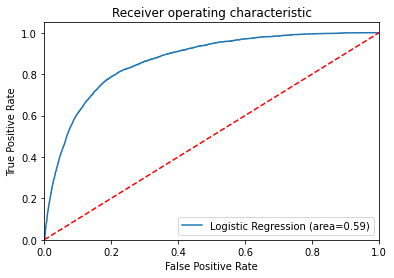

In [91]:
fpr, tpr, thresholds = roc_curve(Y,classifier.predict_proba(X)[:,1]) 
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)'% Logit_roc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()  

In [92]:
import statsmodels.api as sm

In [93]:
logistic = sm.Logit(Y, X) 

In [94]:
logistic.fit().summary()

Optimization terminated successfully.
         Current function value: 0.278899
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45195
Method:                           MLE   Df Model:                           15
Date:                Sat, 18 Jun 2022   Pseudo R-squ.:                  0.2272
Time:                        19:44:27   Log-Likelihood:                -12609.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -1.2107      0.117    -10.332      0.000      -1.440      -0.981
balance       -4.9079      0.666     -7.368      0.000      -6.213      -3.602
day           -0.5649      0.059     -9.553      0.000      -0.681      -0.449
duration      18.5045      0.294     62.864      0.000      17.928      19.081
campaign      -9.3748      0.637    -14.727      0.000     -10.622      -8.127
pdays         -0.5086      0.196     -2.593      0.010      -0.893      -0.124
previous      12.8498      2.181      5.893      0.000       8.576      17.124
job           -0.0201      0.005     -3.916      0.000      -0.030      -0.010
marital       -0.1631      0.027     -5.967      0.000      -0.217      -0.110
education      0.0281      0.022      1.264      0.206      -0.015       0.072
default       -0.4868      0.159     -3.070      0.002      -0.798      -0.176
housing       -1.2827      0.037    -35.063      0.000      -1.354      -1.211
loan          -0.8830      0.056    -15.718      0.000      -0.993      -0.773
contact       -0.6040      0.027    -22.735      0.000      -0.656      -0.552
month          0.0032      0.005      0.595      0.552      -0.007       0.014
poutcome      -0.3240      0.021    -15.360      0.000      -0.365      -0.283
==============================================================================
"""

In [95]:
bank_data1=bank_data.drop(['education','month','pdays','y_pred'],axis=1)
bank_data1.head()

,age,balance,day,duration,campaign,previous,job,marital,default,housing,loan,contact,poutcome,y
0,0.519481,0.092259,0.133333,0.053070,0.0,0.0,4,1,0,1,0,2,3,0
1,0.337662,0.073067,0.133333,0.030704,0.0,0.0,9,2,0,1,0,2,3,0
2,0.194805,0.072822,0.133333,0.015453,0.0,0.0,2,1,0,1,1,2,3,0
3,0.376623,0.086476,0.133333,0.018707,0.0,0.0,1,1,0,1,0,2,3,0
4,0.194805,0.072812,0.133333,0.040260,0.0,0.0,11,2,0,0,0,2,3,0


In [96]:
bank_data1.shape

(45211, 14)

In [97]:
X1= bank_data1.iloc[:,0:13]
Y1= bank_data1.iloc[:,13]
classifier1 = LogisticRegression()
classifier1.fit(X1,Y1) 

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [98]:
classifier1.coef_

array([[ 5.14074212e-01,  2.02782647e+00, -1.87512460e-01,
         1.75133437e+01, -6.21100417e+00,  1.87082400e+00,
         1.21766977e-02,  2.35520840e-01, -2.95675669e-01,
        -9.30977744e-01, -7.21925422e-01, -6.04615365e-01,
        -1.82293907e-01]])

In [99]:
classifier1.predict_proba (X1)

array([[0.96912752, 0.03087248],
       [0.97525877, 0.02474123],
       [0.99368148, 0.00631852],
       ...,
       [0.15763133, 0.84236867],
       [0.81415725, 0.18584275],
       [0.69747208, 0.30252792]])

In [100]:
y_pred1 = classifier1.predict(X1)
bank_data1["y_pred1"] = y_pred1
bank_data1.head()

,age,balance,day,duration,campaign,previous,job,marital,default,housing,loan,contact,poutcome,y,y_pred1
0,0.519481,0.092259,0.133333,0.053070,0.0,0.0,4,1,0,1,0,2,3,0,0
1,0.337662,0.073067,0.133333,0.030704,0.0,0.0,9,2,0,1,0,2,3,0,0
2,0.194805,0.072822,0.133333,0.015453,0.0,0.0,2,1,0,1,1,2,3,0,0
3,0.376623,0.086476,0.133333,0.018707,0.0,0.0,1,1,0,1,0,2,3,0,0
4,0.194805,0.072812,0.133333,0.040260,0.0,0.0,11,2,0,0,0,2,3,0,0


In [101]:
from sklearn.metrics import confusion_matrix
confusion_matrix1 = confusion_matrix(Y1,y_pred1)
print (confusion_matrix1) 

[[39281   641]
 [ 4351   938]]


In [102]:
pd.crosstab(y_pred1,Y1)  

y,0,1
row_0,,
0,39281,4351
1,641,938


In [103]:
accuracy1 = sum(Y1==y_pred1)/bank_data1.shape[0]
accuracy1

0.8895843931786512

In [104]:
from sklearn.metrics import classification_report 
print (classification_report (Y1, y_pred1)) 

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.59      0.18      0.27      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.58      0.61     45211
weighted avg       0.86      0.89      0.86     45211



In [105]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
Logit_roc_score=roc_auc_score(Y1,classifier1.predict(X1))
Logit_roc_score 

0.5806464527742503

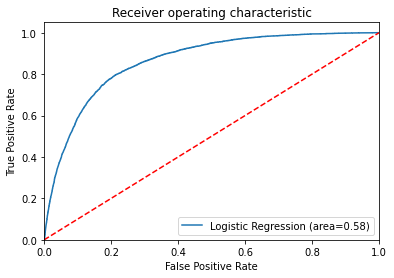

In [106]:
fpr, tpr, thresholds = roc_curve(Y1,classifier1.predict_proba(X1)[:,1]) 
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)'% Logit_roc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()  